### Objective of this project:<br>
Recommend movies to a user-<br>
Through similarities between the movies they've seen<br>
and find similarity between users and recommend movies based on what the similar users like.<br>
Using Item based filtering and Collaborative filtering  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## About the data sets:<br>
### •movies.csv<br>
contains the title, genre and movie id, the movie id being unique<br>
the following genres exist:<br>
-Action<br>
-Adventure<br>
-Animation<br>
-Children's<br>
-Comedy<br>
-Crime<br>
-Documentary<br>
-Drama<br>
-Fantasy<br>
-Film-Noir<br>
-Horror<br>
-Musical<br>
-Mystery<br>
-Romance<br>
-Sci-Fi<br>
-Thriller<br>
-War<br>
-Western<br>
-(no genres listed)<br>
### •ratings.csv<br>
contains userId and the rating they've given the movie<br>
The rating ranges from 0 to 5<br>
### •tags.csv<br>
contains the tag a user has given a movie<br>
### •links.csv<br>
contains the number to put in the url to find the movie on<br>
https://movielens.org <br>
http://www.imdb.com <br>
https://www.themoviedb.org

In [2]:
df_movies = pd.read_csv('movies.csv')
df_movies.head()
a = list()
for t in df_movies['title']:
    l = len(t)
    a.append(t[0:l-7])
df_movies['title'] = pd.DataFrame(a)
# df_movies['title']

In [3]:
df_links = pd.read_csv('links.csv')
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df_tags = pd.read_csv('tags.csv')
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


## EDA

In [6]:
movie_profile = df_movies
movie_profile = movie_profile.drop(columns=['title', 'genres']).set_index('movieId')
movie_profile.sort_index(axis=0, inplace=True)
user_x_movie = pd.pivot_table(df_ratings, values='rating', index=['movieId'], columns = ['userId'])
user_x_movie.sort_index(axis=0, inplace=True)
userIDs = user_x_movie.columns
user_profile = pd.DataFrame(columns = movie_profile.columns)
user_x_movie

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Making a pivot table as it will be beneficial in the future as the rows contain ratings for the movie.<br>
So, if two people like a movie and have rated it similarly, we can just traverse the rows to find similar users.<br>
Then we can traverse the column to recommend movies to the users

In [7]:
df_merge_rating_movie = pd.merge(df_movies, df_ratings, on='movieId')
df_merge_rating_movie = df_merge_rating_movie.drop('timestamp',axis=1)
df_merge_rating_movie.head()

,movieId,title,genres,userId,rating
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [8]:
df_merge_tags_movies = pd.merge(df_movies, df_tags, on='movieId')
df_merge_tags_movies = df_merge_tags_movies.drop('timestamp',axis=1)
df_merge_tags_movies.head()

,movieId,title,genres,userId,tag
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,336,pixar
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,474,pixar
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,567,fun
3,2,Jumanji,Adventure|Children|Fantasy,62,fantasy
4,2,Jumanji,Adventure|Children|Fantasy,62,magic board game


In [9]:
ratings = pd.DataFrame(df_merge_rating_movie.groupby('title')['rating'].mean())
ratings['count'] = pd.DataFrame(df_merge_rating_movie.groupby('title')['rating'].count())
ratings.head()
ratings2 = ratings[ratings['count'] >= 35].sort_values(by = 'count', ascending = False)
ratings2.head()

,rating,count
title,,
Forrest Gump,4.164134,329
"Shawshank Redemption, The",4.429022,317
Pulp Fiction,4.197068,307
"Silence of the Lambs, The",4.161290,279
"Matrix, The",4.192446,278


Just taking the mean of movies makes no sense since if only one person has seen it, and rates it highly, it will skew the data. <br>
So we incorporate that it must be reviewed by n number of viewers so that it's mean rating is fine to be considered.<br>
n here is 35 which is the average number of reviewsa movie has

Text(0.5, 0, 'counts')

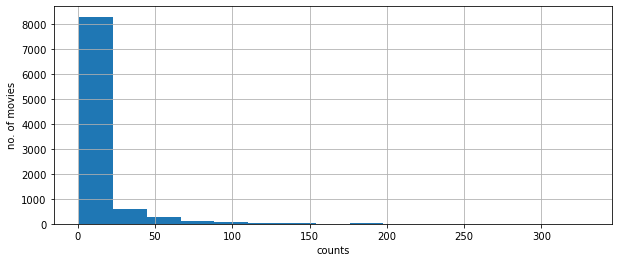

In [10]:
plt.figure(figsize=(10,4))
ratings['count'].hist(bins=15)
plt.ylabel('no. of movies')
plt.xlabel('counts')
# plt.show()

most movies have less than 50 ratings and as stated above, the average value is 35. 

Text(0.5, 0, 'mean ratings')

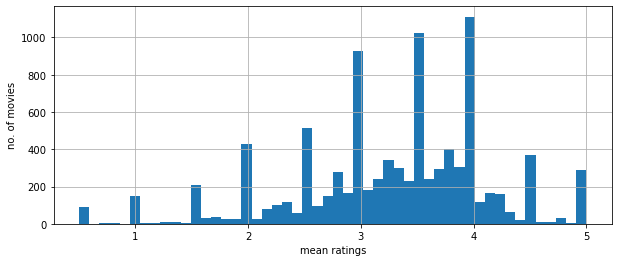

In [11]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=50)
plt.ylabel('no. of movies')
plt.xlabel('mean ratings')
# plt.show()

This shows the distribution of movie ratings and how many movies have a ceratin rating

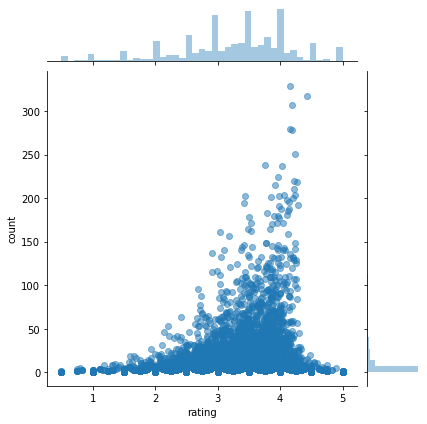

In [12]:
sns.jointplot(x='rating',y='count',data=ratings,alpha=0.5)
# plt.show()

Although, this doesnt convey much,<br> the values on the top right are the best movies because they have a lot of ratings and at the same time it is rated highly by users.<br>
Bottom right are movies that have a high rating but very few ratings so it cant be considered as a good movie<br>
Most of the values are in the middle and upper middle. Upper middle are good movies but there is a significant divide between thsoe who like it and those who dont, so must be careful when recommending these movies.

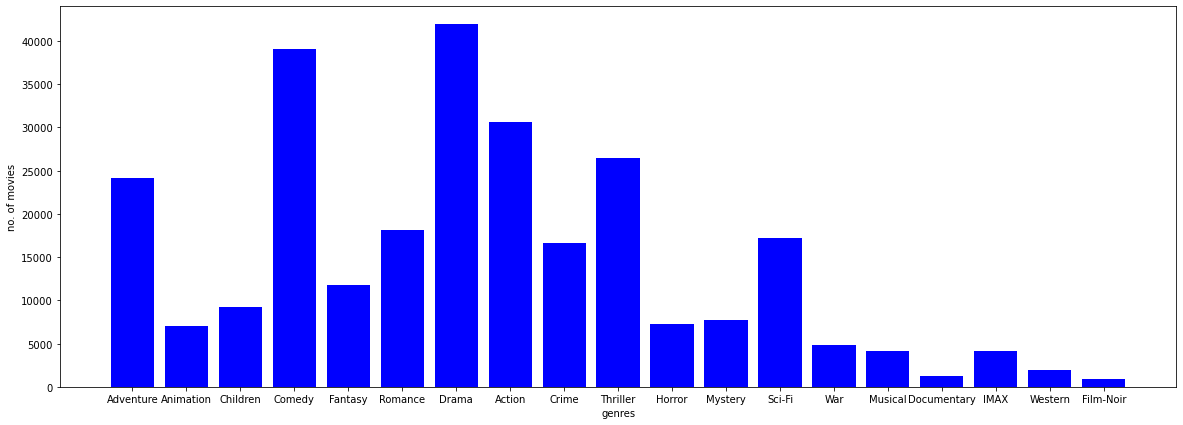

In [13]:
plt.figure(figsize=(20,7))
generlist = df_merge_rating_movie['genres'].apply(lambda generlist_movie : str(generlist_movie).split("|"))
geners_count = {}

for generlist_movie in generlist:
    for i in generlist_movie:
        if(geners_count.get(i, False)):
            geners_count[i]=geners_count[i]+1
        else:
            geners_count[i] = 1       
geners_count.pop("(no genres listed)")
plt.bar(geners_count.keys(),geners_count.values(),color = 'b')
plt.ylabel('no. of movies')
plt.xlabel('genres')
# plt.show()

So, the next step will be to choose the right model to perform user and item based recommendationns

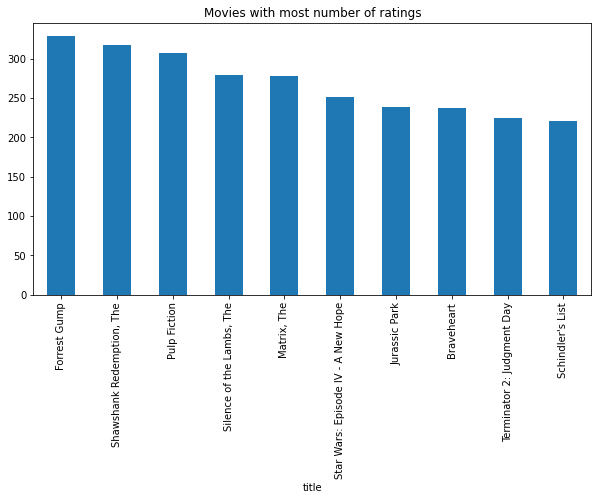

In [14]:
plt.figure(figsize=(20,7))
ratings_grouped_by_movies = df_merge_rating_movie.groupby('title').agg([np.mean, np.size])
ratings_grouped_by_movies.shape
ratings_grouped_by_movies['rating']['size'].sort_values(ascending=False).head(10).plot.bar( figsize = (10,5))
plt.title('Movies with most number of ratings')
# plt.show()

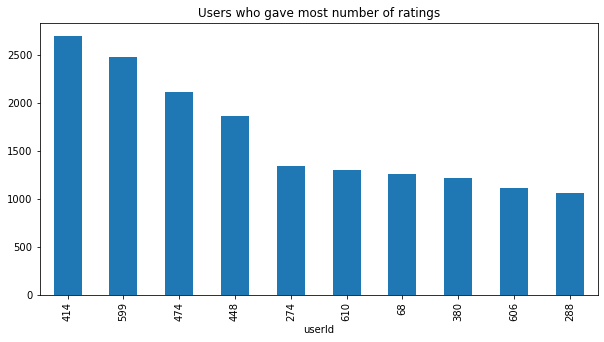

In [15]:
ratings_grouped_by_users = df_merge_rating_movie.groupby('userId').agg([np.size, np.mean])
ratings_grouped_by_users = ratings_grouped_by_users.drop('movieId', axis = 1)
ratings_grouped_by_users['rating']['size'].sort_values(ascending=False).head(10).plot.bar(figsize = (10,5))
plt.title('Users who gave most number of ratings')
# plt.show()

## Item based recomendation system.

In [16]:
from scipy.sparse import csr_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
def encode(series, encoder):
    return encoder.fit_transform(series.values.reshape((-1, 1))).astype(int).reshape(-1)

user_encoder, movie_encoder = OrdinalEncoder(), OrdinalEncoder()
df_merge_rating_movie['user_id_encoding'] = encode(df_merge_rating_movie['userId'], user_encoder)
df_merge_rating_movie['movie_id_encoding'] = encode(df_merge_rating_movie['movieId'], movie_encoder)

matrix = csr_matrix((df_merge_rating_movie['rating'], (df_merge_rating_movie['user_id_encoding'], df_merge_rating_movie['movie_id_encoding'])))

In [18]:
df_merge_rating_movie.head()

,movieId,title,genres,userId,rating,user_id_encoding,movie_id_encoding
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,0,0
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,4,0
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,6,0
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,14,0
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,16,0


In [19]:
df_matrix = pd.DataFrame(matrix.toarray())
df_matrix

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#Normalizing the matrix
#Rows represent Users
#Columns represent Movies

In [21]:
df_matrix = df_matrix.sub(df_matrix.sum(axis=1)/df_matrix.shape[1],axis=0)
df_matrix

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,3.895825,-0.104175,3.895825,-0.104175,-0.104175,3.895825,-0.104175,-0.104175,-0.104175,-0.104175,...,-0.104175,-0.104175,-0.104175,-0.104175,-0.104175,-0.104175,-0.104175,-0.104175,-0.104175,-0.104175
1,-0.011775,-0.011775,-0.011775,-0.011775,-0.011775,-0.011775,-0.011775,-0.011775,-0.011775,-0.011775,...,-0.011775,-0.011775,-0.011775,-0.011775,-0.011775,-0.011775,-0.011775,-0.011775,-0.011775,-0.011775
2,-0.009770,-0.009770,-0.009770,-0.009770,-0.009770,-0.009770,-0.009770,-0.009770,-0.009770,-0.009770,...,-0.009770,-0.009770,-0.009770,-0.009770,-0.009770,-0.009770,-0.009770,-0.009770,-0.009770,-0.009770
3,-0.078980,-0.078980,-0.078980,-0.078980,-0.078980,-0.078980,-0.078980,-0.078980,-0.078980,-0.078980,...,-0.078980,-0.078980,-0.078980,-0.078980,-0.078980,-0.078980,-0.078980,-0.078980,-0.078980,-0.078980
4,3.983546,-0.016454,-0.016454,-0.016454,-0.016454,-0.016454,-0.016454,-0.016454,-0.016454,-0.016454,...,-0.016454,-0.016454,-0.016454,-0.016454,-0.016454,-0.016454,-0.016454,-0.016454,-0.016454,-0.016454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2.080625,-0.419375,-0.419375,-0.419375,-0.419375,-0.419375,2.080625,-0.419375,-0.419375,-0.419375,...,-0.419375,-0.419375,-0.419375,-0.419375,-0.419375,-0.419375,-0.419375,-0.419375,-0.419375,-0.419375
606,3.927190,-0.072810,-0.072810,-0.072810,-0.072810,-0.072810,-0.072810,-0.072810,-0.072810,-0.072810,...,-0.072810,-0.072810,-0.072810,-0.072810,-0.072810,-0.072810,-0.072810,-0.072810,-0.072810,-0.072810
607,2.232158,1.732158,1.732158,-0.267842,-0.267842,-0.267842,-0.267842,-0.267842,-0.267842,3.732158,...,-0.267842,-0.267842,-0.267842,-0.267842,-0.267842,-0.267842,-0.267842,-0.267842,-0.267842,-0.267842
608,2.987557,-0.012443,-0.012443,-0.012443,-0.012443,-0.012443,-0.012443,-0.012443,-0.012443,3.987557,...,-0.012443,-0.012443,-0.012443,-0.012443,-0.012443,-0.012443,-0.012443,-0.012443,-0.012443,-0.012443


In [22]:
cosine_matrix = cosine_similarity(df_matrix.T, df_matrix.T)
movie_encoder.inverse_transform([[1]])

array([[2]])

In [23]:
title_list = df_merge_rating_movie.groupby('title')['movieId'].agg('min')
title_list['Iron Man']

59315

In [24]:
offline_results = {
    movie_id: np.argsort(similarities)[::-1]
    for movie_id, similarities in enumerate(cosine_matrix)
}
class recc:
    def get_recommendations(self,movie_title, top_n):
        movie_id = title_list[movie_title]
        print(movie_id)
        movie_csr_id = movie_encoder.transform([[movie_id]])[0, 0].astype(int)
        rankings = offline_results[movie_csr_id][:top_n]
#         print(rankings)
        ranked_indices = movie_encoder.inverse_transform(rankings.reshape((-1, 1))).reshape(-1)
#         print(ranked_indices)
        temp = df_movies.set_index('movieId').loc[ranked_indices]
        return temp['title'].tolist()

In [25]:
a = recc()
# cosine_matrix.shape
# a.get_recommendations("Iron Man", 10)

In [26]:
import pickle
pickle_out = open('recc.pkl', 'wb')
pickle.dump(a, pickle_out)
pickle_out.close()

## User based recomendation system.

In [27]:
def encode(series, encoder):
    return encoder.fit_transform(series.values.reshape((-1, 1))).astype(int).reshape(-1)

user_encoder, movie_encoder = OrdinalEncoder(), OrdinalEncoder()
df_merge_rating_movie['user_id_encoding'] = encode(df_merge_rating_movie['userId'], user_encoder)
df_merge_rating_movie['movie_id_encoding'] = encode(df_merge_rating_movie['movieId'], movie_encoder)

matrix2 = csr_matrix((df_merge_rating_movie['rating'],df_merge_rating_movie['user_id_encoding'], (df_merge_rating_movie['movie_id_encoding'])))

In [28]:
# df_merge_rating_movie.head()

In [29]:
df_matrix2 = pd.DataFrame(matrix.toarray())
pleaseWork = np.array(df_matrix2)
# df_matrix2

In [30]:
df_matrix2 = df_matrix2.sub(df_matrix2.sum(axis=1)/df_matrix2.shape[1],axis=0)

In [31]:
cosine_matrix2 = cosine_similarity(df_matrix2, df_matrix2)
user_encoder.inverse_transform([[1]])
cosine_matrix2.shape

(610, 610)

In [32]:
# userList = df_merge_rating_movie.groupby('title')['userId'].agg('mean')
# userList

In [33]:
offline_results2 = {
    user_id: np.argsort(similarities)[::-1]
    for user_id, similarities in enumerate(cosine_matrix2)
}
class recc2:
    def get_recommendations2(self, userID, top_n):
        ranked_indices2 = list()
        ranked_indices3 = pd.DataFrame()
        user_csr_id = user_encoder.transform([[userID]])[0, 0].astype(int)
        rankings = offline_results2[user_csr_id][:top_n]
        
        for i in rankings:
            topSimilar = (np.where(pleaseWork[i][:] == np.amax(pleaseWork[i][:], axis = 0)))
            if i != user_csr_id:
                for j in topSimilar:
                    ranked_indices2.append(j[np.random.randint(0, len(j))])
#             ranked_indices2.append(topSimilar)
#         print(ranked_indices2)
        ranked_indices = np.array(ranked_indices2)
        for k in ranked_indices:
            ranked_indices3 = ranked_indices3.append(df_movies[df_movies['movieId']==k])
        ranked_indices3 = ranked_indices3.set_index('movieId')   
#         ranked_indices = user_encoder.inverse_transform(rankings.reshape((-1, 1))).reshape(-1)
#         print(ranked_indices)
        return ranked_indices3['title'].tolist()
#         return df_movies.set_index('movieId').loc[ranked_indices]

In [34]:
a2 = recc2()
# a2.get_recommendations2(68, 10)

In [35]:
import pickle
pickle_out2 = open('recc2.pkl', 'wb')
pickle.dump(a2, pickle_out2)
pickle_out2.close()